# Titanic

In [1]:
import pandas as pd

train = pd.read_csv('csv/train.csv')
test = pd.read_csv('csv/test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head() # 당연히 survived field는 없음

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## visualization

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Check Survived/Dead

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

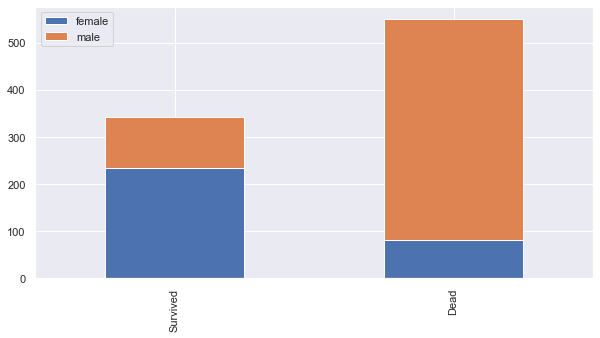

In [12]:
bar_chart('Sex')

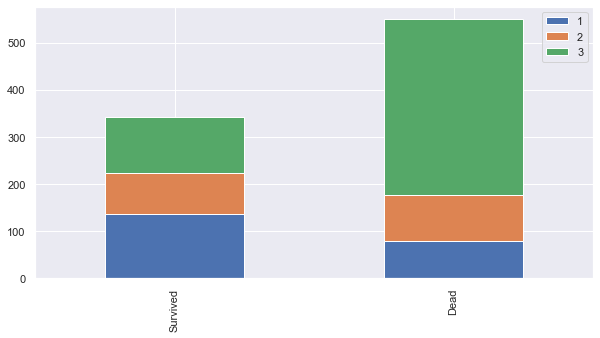

In [13]:
bar_chart('Pclass')

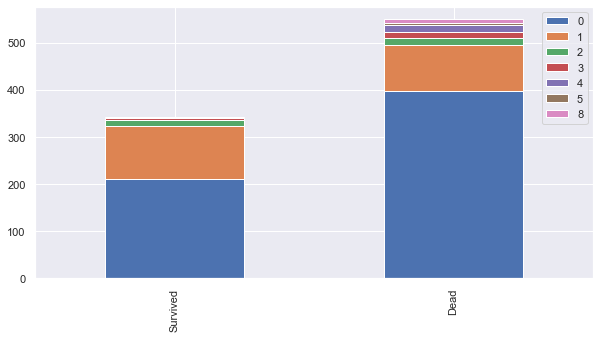

In [14]:
bar_chart('SibSp')

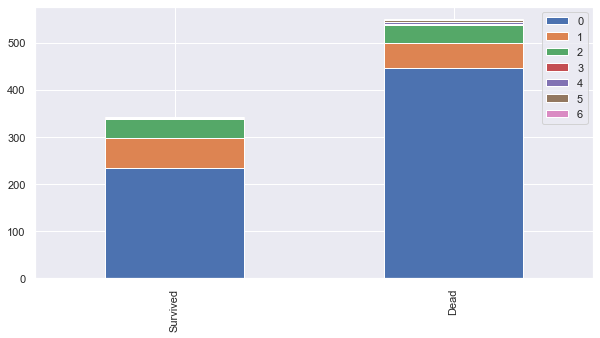

In [15]:
bar_chart('Parch')

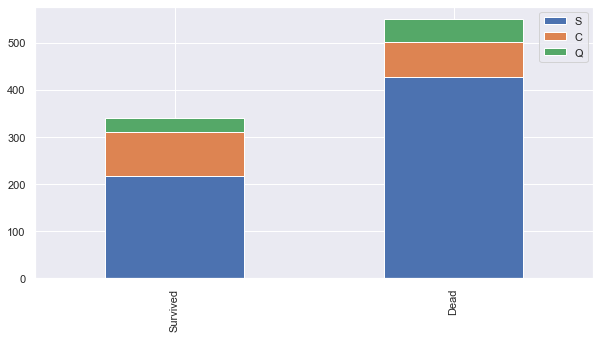

In [16]:
bar_chart('Embarked')

### 아이와 여자부터 구한 것으로 보인다. 클래스별 승객 비율로 보았을 때 상위 클래스의 승객이 많이 생존한 것이 확인된다.

### 이름에서 Mr, Miss, Mrs 등과 같이 예측할 수 있는 정보들을 추출할 수 있다.

## Name

In [17]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Capt          1
Sir           1
Mme           1
Countess      1
Don           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [19]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [20]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3,
                "Dr":4, "Rev":3, "Col":3, "Major":3, "Mlle":3,
                 "Countess":3, "Ms":3, "Lady":3, "Jonkheer":3, 
                "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


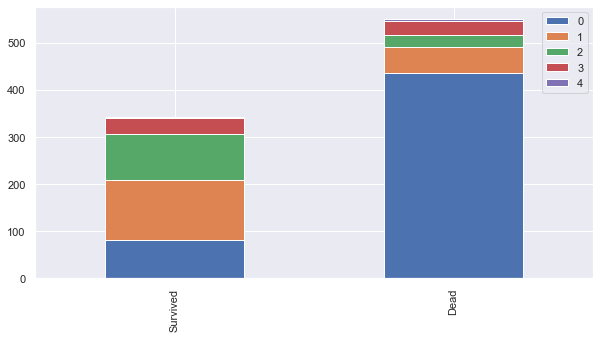

In [23]:
bar_chart('Title')

In [24]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## Sex

In [27]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

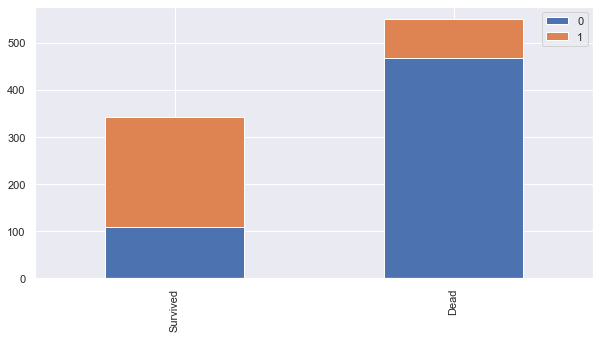

In [28]:
bar_chart('Sex')

## Age

In [29]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


### 값이 없다면 평균 또는 중앙값으로 채우면 될 것!

In [30]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby("Title")['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby("Title")['Age'].transform('median'), inplace=True)

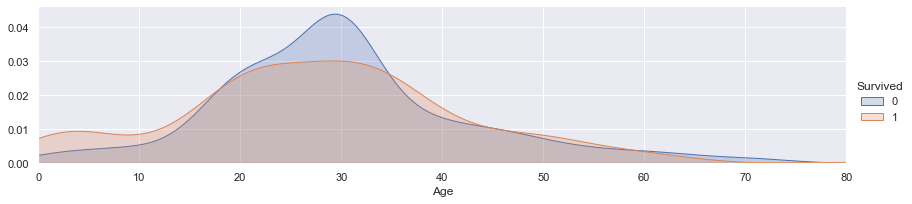

In [31]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

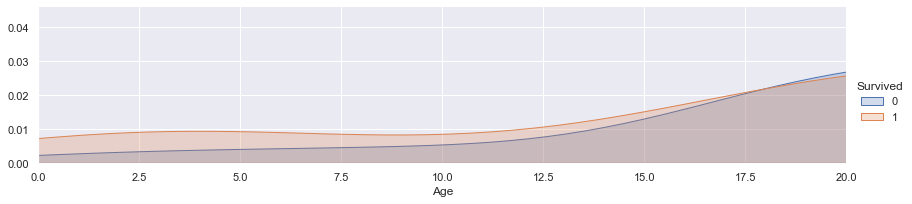

In [32]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

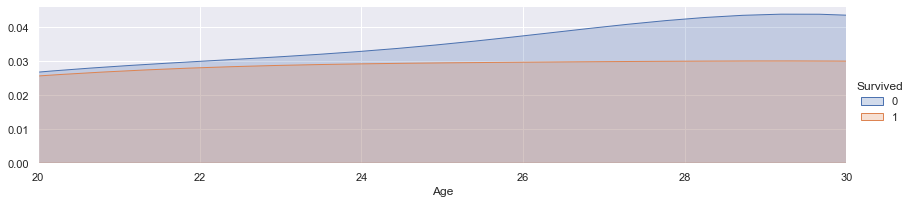

In [33]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

## Binning

In [34]:
'''
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & 
                (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & 
                (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & 
                (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
'''

"\nfor dataset in train_test_data:\n    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,\n    dataset.loc[(dataset['Age'] > 16) & \n                (dataset['Age'] <= 26), 'Age'] = 1,\n    dataset.loc[(dataset['Age'] > 26) & \n                (dataset['Age'] <= 36), 'Age'] = 2,\n    dataset.loc[(dataset['Age'] > 36) & \n                (dataset['Age'] <= 62), 'Age'] = 3,\n    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4\n"

## Embarked

<AxesSubplot:>

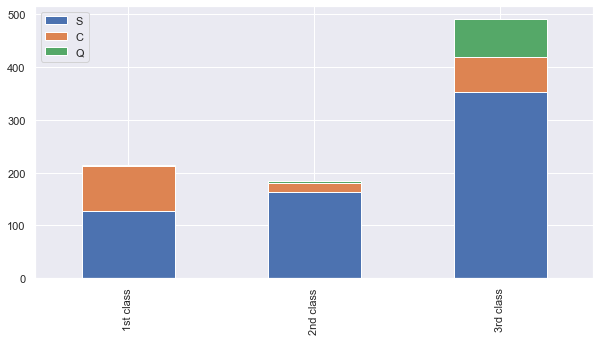

In [35]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

### fill missing embark with S embark

In [36]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [38]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare

In [39]:
#fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,1,2


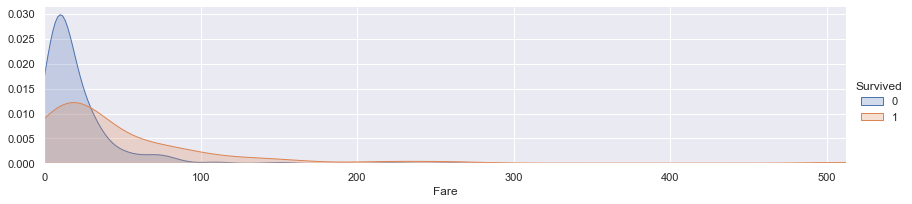

In [40]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0.0, 20.0)

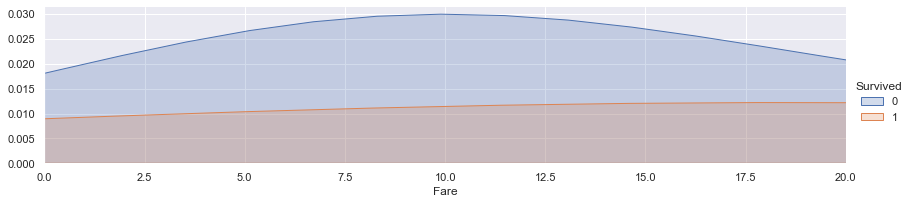

In [41]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 512.3292)

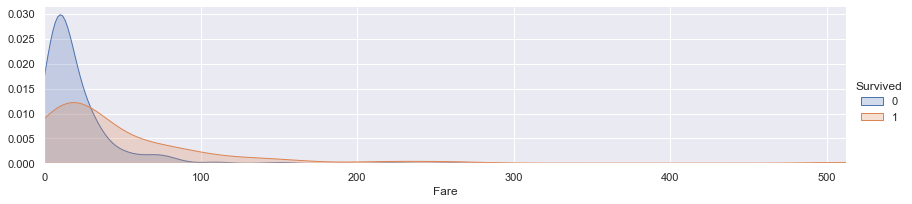

In [42]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [43]:
'''
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
'''

"\nfor dataset in train_test_data:\n    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,\n    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,\n    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,\n    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3\n"

## Cabin

In [44]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F2             3
              ..
C86            1
D46            1
E40            1
D9             1
B86            1
Name: Cabin, Length: 147, dtype: int64

In [45]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

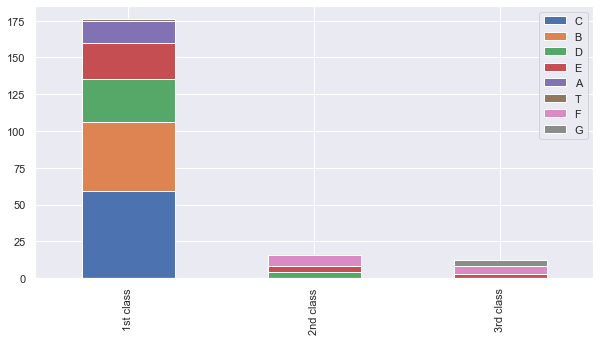

In [46]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [47]:
# feature scaling
# male, female 인 극과 극의 차이가 0, 1로 1차이가 난다.
# 3등급 티켓이 5, 10달러라 할 때 같은 3등급인데 차이가 5나 난다.
# 이로 인한 오류를 막기 위해 차이를 소수점 단위로 매핑하여 중요도를 낮춘다.
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [48]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## FamilySize

In [49]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

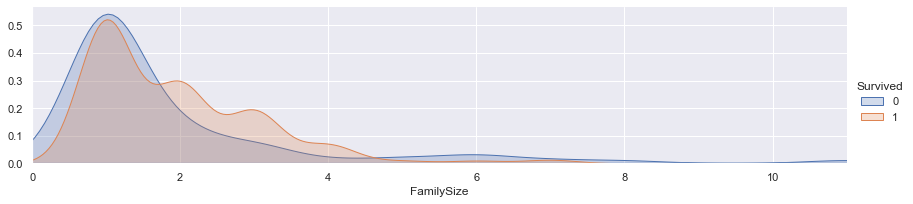

In [50]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [51]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,0.0


In [53]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [54]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [55]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,22.0,7.2500,2.0,0,0,0.4
1,1,1,38.0,71.2833,0.8,1,2,0.4
2,3,1,26.0,7.9250,2.0,0,1,0.0
3,1,1,35.0,53.1000,0.8,0,2,0.4
4,3,0,35.0,8.0500,2.0,0,0,0.0
5,3,0,30.0,8.4583,2.0,2,0,0.0
6,1,0,54.0,51.8625,1.6,0,0,0.0
7,3,0,2.0,21.0750,2.0,0,3,1.6
8,3,1,27.0,11.1333,2.0,0,2,0.8
9,2,1,14.0,30.0708,1.8,1,2,0.4


## Modeling

In [56]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


## Cross validation (k-fold)

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### KNN

In [59]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.72222222 0.79775281 0.71910112 0.66292135 0.69662921 0.73033708
 0.75280899 0.73033708 0.71910112 0.74157303]


In [60]:
# kNN Score
round(np.mean(score)*100, 2)

72.73

### Decision Tree

In [61]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74444444 0.80898876 0.7752809  0.7752809  0.75280899 0.83146067
 0.75280899 0.7752809  0.79775281 0.75280899]


In [62]:
# decision tree Score
round(np.mean(score)*100, 2)

77.67

### Random Forest

In [63]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.86516854 0.79775281 0.78651685 0.83146067 0.83146067
 0.80898876 0.78651685 0.76404494 0.79775281]


In [64]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.47

### Naive Bayes

In [65]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.75280899 0.75280899 0.76404494 0.73033708 0.83146067
 0.7752809  0.82022472 0.82022472 0.83146067]


In [66]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.9

### SVM

In [67]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.66666667 0.78651685 0.68539326 0.57303371 0.76404494 0.70786517
 0.66292135 0.68539326 0.60674157 0.62921348]


In [68]:
round(np.mean(score)*100,2)

67.68

## Testing

In [72]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [73]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [74]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
